In [61]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from pycaret.classification import *
import mlflow


In [62]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))


In [63]:
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['target'], test_size=0.2, random_state=42, stratify=df['target']
)


In [65]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [67]:
train_data = pd.DataFrame(X_train_tfidf.toarray())
train_data['target'] = y_train.values


In [72]:
exp = setup(
    data=train_data,
    target='target',
    session_id=42,
    log_experiment=False,   
    verbose=False
)


In [73]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6870,0.0000,0.6870,0.6965,0.6850,0.6702,0.6710,3.4540
ridge,Ridge Classifier,0.6857,0.0000,0.6857,0.6930,0.6849,0.6689,0.6694,1.3630
svm,SVM - Linear Kernel,0.6809,0.0000,0.6809,0.6938,0.6778,0.6637,0.6649,1.6740
et,Extra Trees Classifier,0.6516,0.9417,0.6516,0.6551,0.6465,0.6328,0.6337,4.3600
lightgbm,Light Gradient Boosting Machine,0.6395,0.9463,0.6395,0.6501,0.6400,0.6202,0.6210,13.0800
rf,Random Forest Classifier,0.6180,0.9365,0.6180,0.6218,0.6127,0.5974,0.5983,3.0990
gbc,Gradient Boosting Classifier,0.6058,0.0000,0.6058,0.6501,0.6187,0.5847,0.5877,71.3050
lda,Linear Discriminant Analysis,0.5875,0.0000,0.5875,0.6136,0.5946,0.5656,0.5664,10.6140
nb,Naive Bayes,0.4801,0.7347,0.4801,0.4868,0.4775,0.4524,0.4531,0.8540
dt,Decision Tree Classifier,0.4726,0.7332,0.4726,0.4876,0.4748,0.4444,0.4453,2.4150


In [74]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [76]:
final_model = finalize_model(best_model)


In [77]:
test_data = pd.DataFrame(X_test_tfidf.toarray())
test_data['target'] = y_test.values


In [78]:
predictions = predict_model(final_model, data=test_data)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7045,0.9641,0.7045,0.7118,0.7035,0.6887,0.6893


In [79]:
from sklearn.metrics import classification_report, accuracy_score

y_true = y_test
y_pred = predictions['prediction_label']

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))


Accuracy: 0.7045092838196286
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       160
           1       0.70      0.67      0.68       195
           2       0.68      0.66      0.67       197
           3       0.62      0.64      0.63       196
           4       0.74      0.67      0.70       193
           5       0.84      0.84      0.84       198
           6       0.79      0.74      0.76       195
           7       0.47      0.77      0.59       198
           8       0.72      0.66      0.69       199
           9       0.82      0.80      0.81       199
          10       0.90      0.86      0.88       200
          11       0.84      0.75      0.79       198
          12       0.64      0.68      0.66       197
          13       0.72      0.79      0.76       198
          14       0.80      0.74      0.77       197
          15       0.69      0.81      0.75       199
          16       0.62      0.69      0.65       18

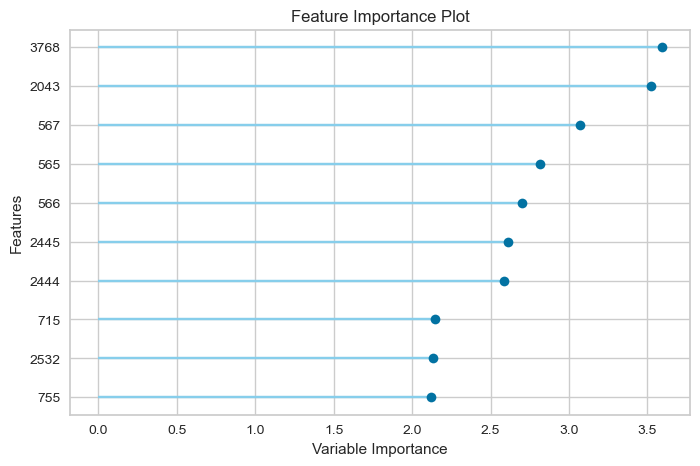

In [80]:
plot_model(best_model, plot='feature')


In [81]:
save_model(final_model, 'best_pycaret_text_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                                               fill_value=None,
                                                     

In [82]:
import mlflow

with mlflow.start_run(run_name="PyCaret_Text_Classification_Final"):
    mlflow.log_param("model", str(best_model))
    mlflow.log_metric("accuracy", accuracy_score(y_true, y_pred))
